In [18]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import re

In [19]:
# Load the dataset (adjust path if needed)
file_path = r'D:\UDINUS\SMT5\STKI\tugas3\stki\Unstructured Data English.csv'
data = pd.read_csv(file_path, delimiter=';')

In [20]:
# Inspect the first few rows
print(data.head())

# Load the English model from spaCy
nlp = spacy.load('en_core_web_sm')

   ID                           Katakana text Translated Unnamed: 2  \
0   1  Huge @Patriots pep rally at Toso's in PHX...wa...        NaN   
1   2  For Robert Kraft and Roger Goodell air still i...        NaN   
2   3  For Robert Kraft and Roger Goodell air still i...        NaN   
3   4  Need #recipes? Visit the Kraft #CookingUpGood ...        NaN   
4   5  @EdgeofSports You take the good-You take the b...        NaN   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [21]:
# Define a function to extract named entities from text
def extract_entities(text):
    if pd.isnull(text):
        return None
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [22]:
# Apply the function to the text column (adjust column name if needed)
data['Named Entities'] = data['Katakana text Translated'].apply(extract_entities)

# Display the first few rows with named entities
print(data.head())

   ID                           Katakana text Translated Unnamed: 2  \
0   1  Huge @Patriots pep rally at Toso's in PHX...wa...        NaN   
1   2  For Robert Kraft and Roger Goodell air still i...        NaN   
2   3  For Robert Kraft and Roger Goodell air still i...        NaN   
3   4  Need #recipes? Visit the Kraft #CookingUpGood ...        NaN   
4   5  @EdgeofSports You take the good-You take the b...        NaN   

   Unnamed: 3                                     Named Entities  
0         NaN                         [(PHX, ORG), (Kraft, ORG)]  
1         NaN  [(Robert Kraft, PERSON), (Roger Goodell, PERSO...  
2         NaN  [(Robert Kraft, PERSON), (Roger Goodell, PERSO...  
3         NaN                                     [(Kraft, ORG)]  
4         NaN                        [(Givin Bob Kraft, PERSON)]  


In [23]:
# Flatten the list of entities and count their frequencies
all_entities = [ent[0] for sublist in data['Named Entities'] for ent in sublist if sublist is not None]
entity_counts = Counter(all_entities)

In [24]:
# Clean entity names by removing special characters
cleaned_entities = [re.sub(r'[^A-Za-z0-9 ]+', '', entity) for entity in all_entities]

# Count frequencies of cleaned entities
entity_counts = Counter(cleaned_entities)

In [25]:
# Convert the counts to a DataFrame for visualization
entity_counts_df = pd.DataFrame(entity_counts.items(), columns=['Entity', 'Frequency'])

In [26]:
# Sort the DataFrame by frequency
entity_counts_df = entity_counts_df.sort_values(by='Frequency', ascending=False)

C:\Users\riadi\AppData\Local\Temp\ipykernel_24696\3491260852.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


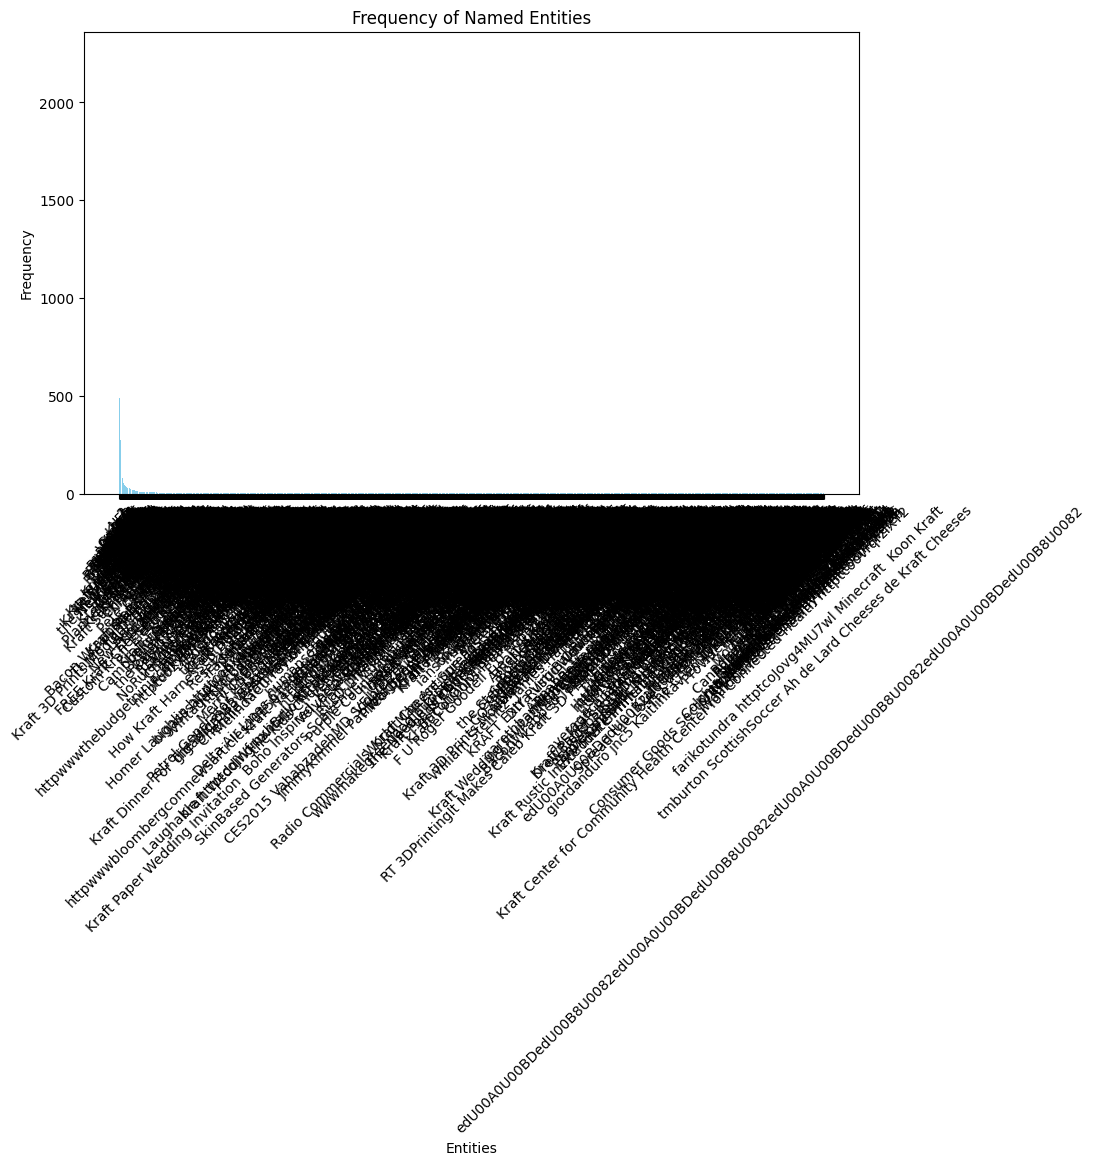

In [28]:
# Visualize the frequency of entities using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(entity_counts_df['Entity'], entity_counts_df['Frequency'], color='skyblue')
plt.title('Frequency of Named Entities')
plt.xlabel('Entities')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Save the results to a new CSV file
output_path = 'NER_Results.csv'
data.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

Results saved to NER_Results.csv
